In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

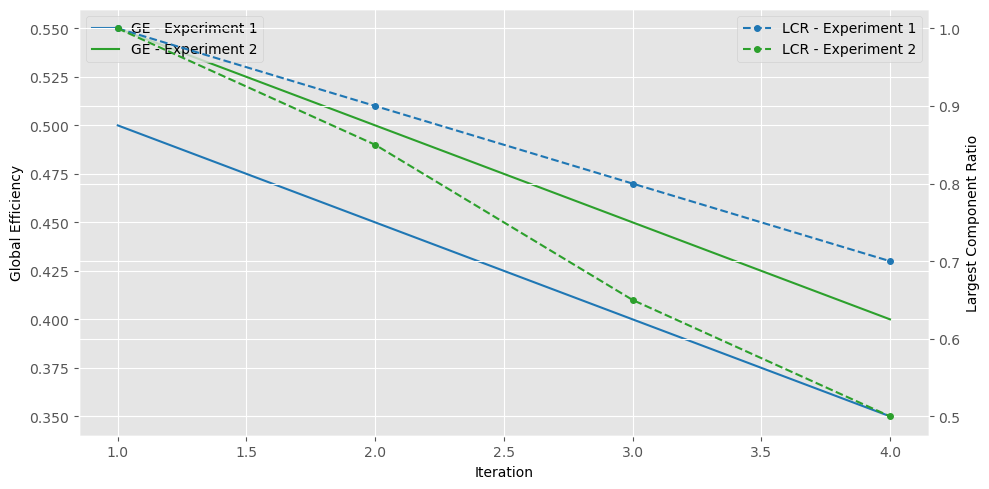

In [2]:
def visualize_results(result_dicts, labels):
    plt.style.use('ggplot')
    
    # 确保labels的长度与result_dicts一致
    assert len(result_dicts) == len(labels), "Labels list must match the length of result_dicts list."
    
    # 定义每个实验的颜色和线型
    colors = ['tab:blue', 'tab:green', 'tab:red', 'tab:purple', 'tab:orange']
    line_styles = ['-', '--']  # 一个用于全局效率，一个用于最大连通分量比例
    
    # 创建图表和坐标轴
    fig, ax1 = plt.subplots(figsize=(10, 5))
    
    # 配置第一个y轴（全局效率）
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Global Efficiency')
    ax1.tick_params(axis='y')
    
    # 配置第二个y轴（最大连通分量比例）
    ax2 = ax1.twinx()
    ax2.set_ylabel('Largest Component Ratio')
    ax2.tick_params(axis='y')
    
    # 绘制每个实验的数据
    for idx, (result_dict, label) in enumerate(zip(result_dicts, labels)):
        iterations = list(range(1, len(result_dict['global_efficiency']) + 1))
        # 绘制全局效率
        ax1.plot(iterations, result_dict['global_efficiency'], line_styles[0], label=f'GE - {label}', color=colors[idx % len(colors)])
        # 绘制最大连通分量比例
        ax2.plot(iterations, result_dict['largest_component_ratio'], line_styles[1], label=f'LCR - {label}', color=colors[idx % len(colors)], marker='o', markersize=4)
    
    # 添加图例
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    
    fig.tight_layout()  # 调整布局以防止重叠
    plt.show()

# 使用示例
results1 = {
    'largest_component_ratio': [1, 0.9, 0.8, 0.7],
    'global_efficiency': [0.5, 0.45, 0.4, 0.35],
    'num_degree': [50, 45, 40, 35],
    'num_si_edge': [100, 90, 80, 70],
    'num_m_edge': [150, 140, 130, 120]
}

results2 = {
    'largest_component_ratio': [1, 0.85, 0.65, 0.5],
    'global_efficiency': [0.55, 0.5, 0.45, 0.4],
    'num_degree': [55, 50, 45, 40],
    'num_si_edge': [110, 100, 90, 80],
    'num_m_edge': [160, 150, 140, 130]
}

# 可视化函数调用
visualize_results([results1, results2], ['Experiment 1', 'Experiment 2'])

In [3]:
def load_results_form_pickel(file_name):
    with open(file_name, 'rb') as file:
        data_loaded = pickle.load(file)
    return data_loaded

In [8]:
remove_random_node_result = load_results_form_pickel('remove_random_node')
remove_highest_degree_node_simple_result = load_results_form_pickel('remove_highest_degree_node_simple')
remove_highest_degree_node_multi_result = load_results_form_pickel('remove_highest_degree_node_multi')
remove_highest_betweenness_node_simple_result = load_results_form_pickel('remove_highest_betweenness_node_simple')

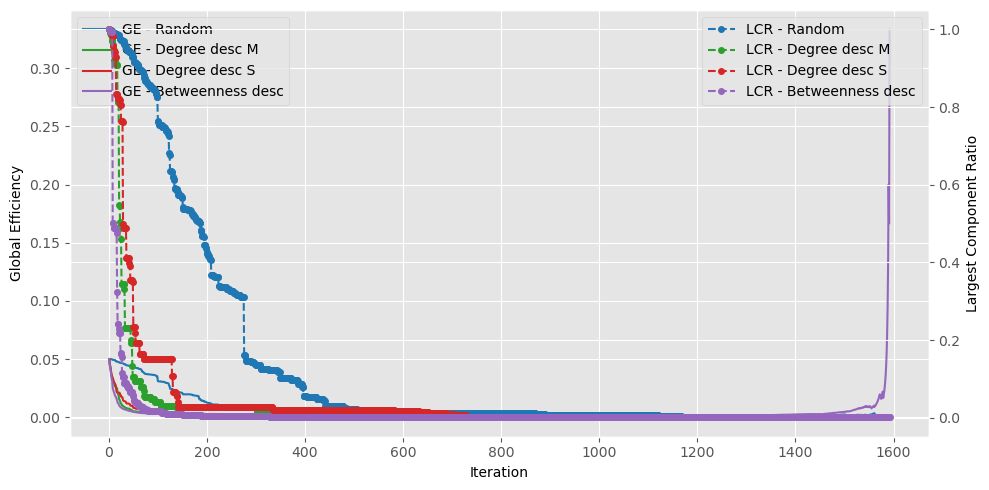

In [10]:
visualize_results([remove_random_node_result,remove_highest_degree_node_simple_result,remove_highest_degree_node_multi_result,remove_highest_betweenness_node_simple_result],['Random','Degree desc M', 'Degree desc S','Betweenness desc'])

In [47]:

def visualize_results_separate(result_dicts, labels, percent_display=1.0):
    plt.style.use('ggplot')
    
    # 确保labels的长度与result_dicts一致
    assert len(result_dicts) == len(labels), "Labels list must match the length of result_dicts list."
    
    # 定义每个实验的颜色
    colors = ['tab:blue', 'tab:green', 'tab:red', 'tab:purple', 'tab:orange']
    line_style = '-'  # 统一的线型，简化视觉效果
    
    # 找到最长的数据长度
    max_length = max(len(d['global_efficiency']) for d in result_dicts)
    display_limit = int(max_length * percent_display)  # 计算显示的迭代上限

    # 全局效率图
    fig1, ax1 = plt.subplots(figsize=(8, 6))
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Global Efficiency')
    for idx, (result_dict, label) in enumerate(zip(result_dicts, labels)):
        iterations = list(range(1, len(result_dict['global_efficiency']) + 1))
        ax1.plot(iterations[:display_limit], result_dict['global_efficiency'][:display_limit], line_style, label=f'GE - {label}', color=colors[idx % len(colors)])
    ax1.legend(loc='upper right')
    ax1.set_title('Global Efficiency Over Iterations')
    fig1.tight_layout()  # 调整布局以防止重叠
    
    # 最大连通分量比例图
    fig2, ax2 = plt.subplots(figsize=(8, 6))
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Largest Component Ratio')
    for idx, (result_dict, label) in enumerate(zip(result_dicts, labels)):
        iterations = list(range(1, len(result_dict['largest_component_ratio']) + 1))
        ax2.plot(iterations[:display_limit], result_dict['largest_component_ratio'][:display_limit], line_style, label=f'LCR - {label}', color=colors[idx % len(colors)], marker='o', markersize=4)
    ax2.legend(loc='upper right')
    ax2.set_title('Largest Component Ratio Over Iterations')
    fig2.tight_layout()  # 调整布局以防止重叠

    plt.show()

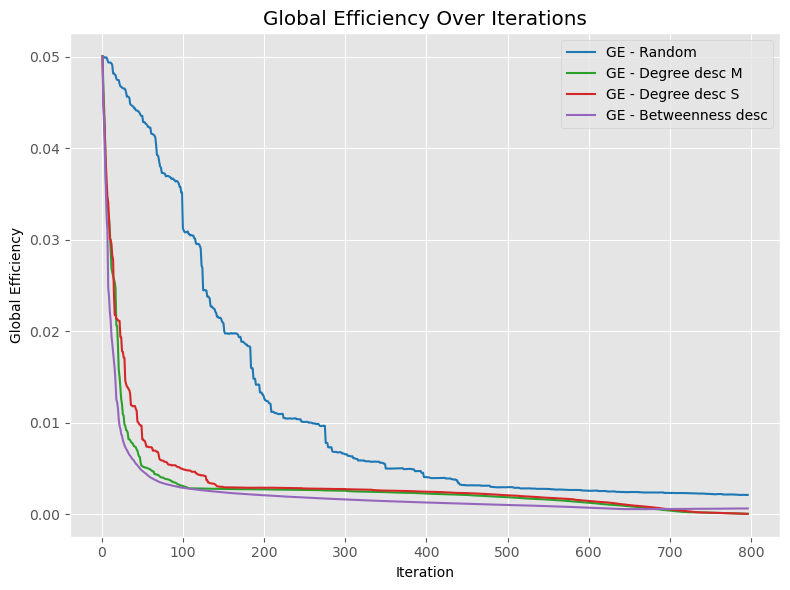

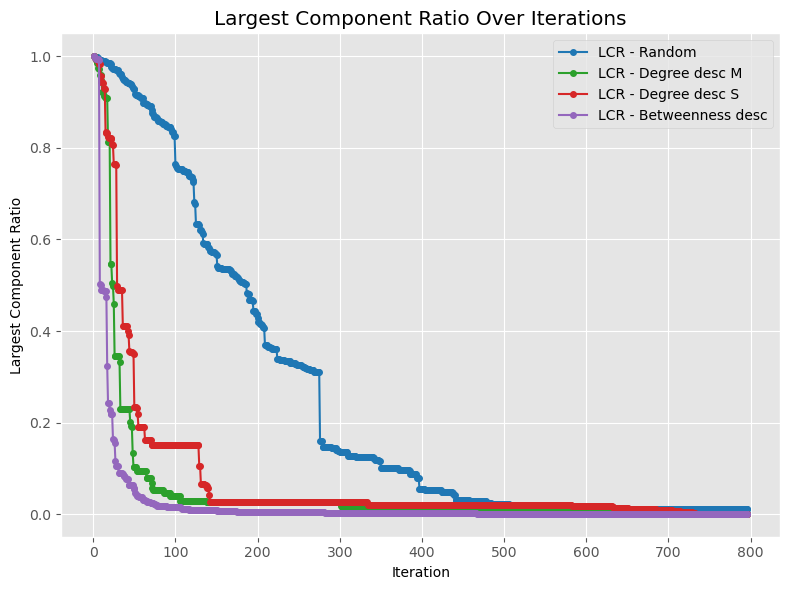

In [49]:
visualize_results_separate([remove_random_node_result,remove_highest_degree_node_simple_result,remove_highest_degree_node_multi_result,remove_highest_betweenness_node_simple_result],['Random','Degree desc M', 'Degree desc S','Betweenness desc'], percent_display=0.5)

In [26]:
remove_random_edge_multi_result = load_results_form_pickel('remove_random_edge_multi')
remove_edge_by_betweenness_multi_result = load_results_form_pickel('remove_edge_by_betweenness_multi')
remove_edge_by_betweenness_simple_result = load_results_form_pickel('remove_edge_by_betweenness_simple')

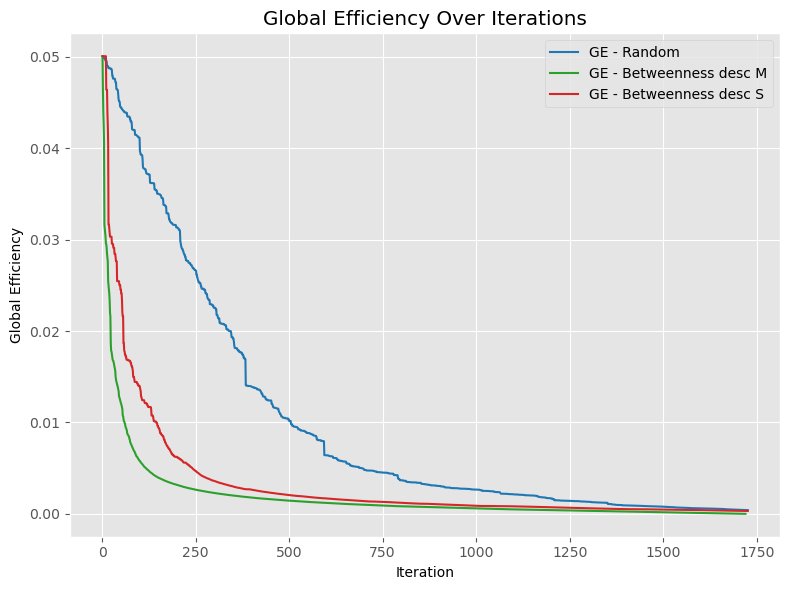

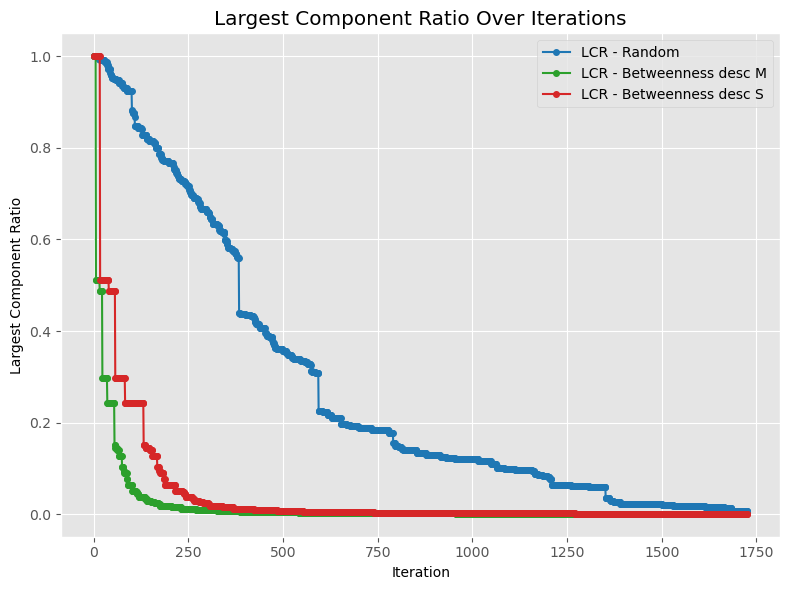

In [52]:
visualize_results_separate([remove_random_edge_multi_result, remove_edge_by_betweenness_simple_result, remove_edge_by_betweenness_multi_result],['Random','Betweenness desc M', 'Betweenness desc S'],percent_display=0.8)

In [36]:
remove_random_node_result_2 = load_results_form_pickel('remove_random_node_2')
remove_random_node_result_3 = load_results_form_pickel('remove_random_node_3')

remove_random_edge_multi_result_2 = load_results_form_pickel('remove_random_edge_multi_2')
remove_random_edge_multi_result_3 = load_results_form_pickel('remove_random_edge_multi_3')

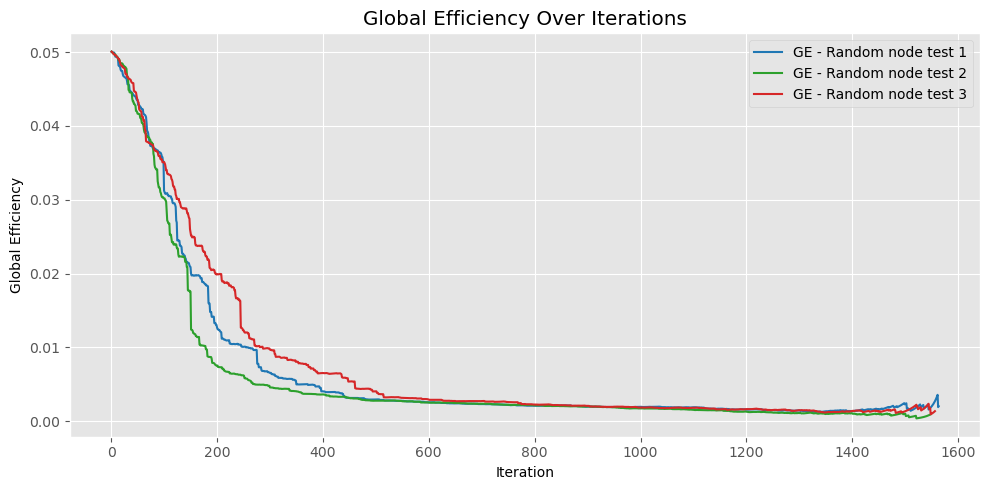

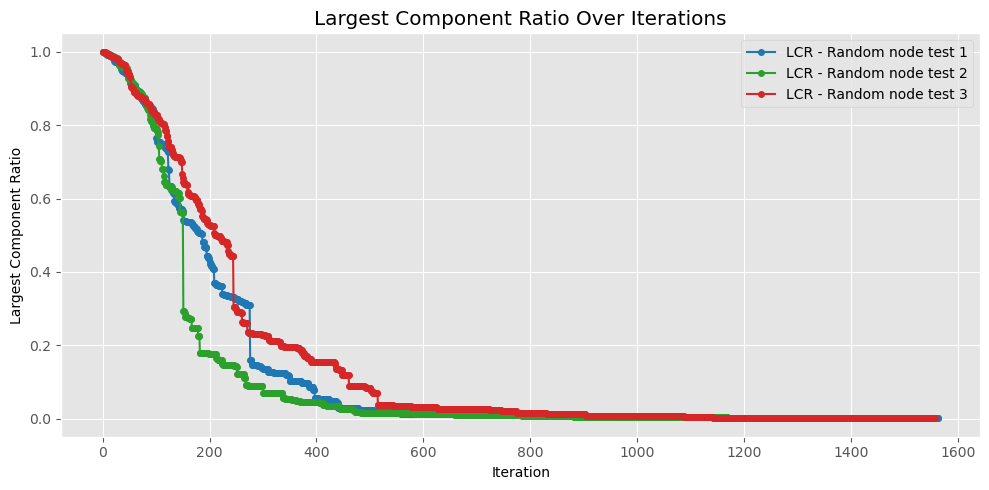

In [37]:
visualize_results_separate([remove_random_node_result,
                            remove_random_node_result_2,
                            remove_random_node_result_3],['Random node test 1', 'Random node test 2', 'Random node test 3'], percent_display=1)

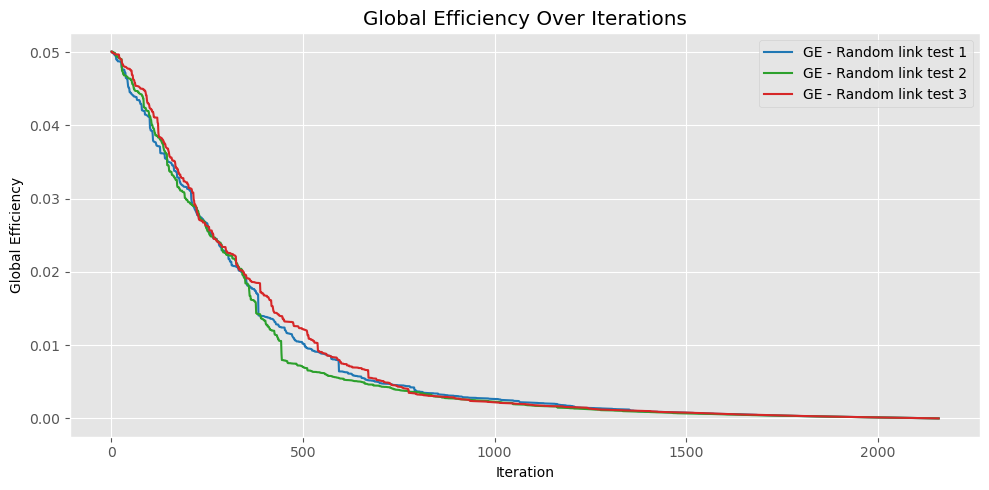

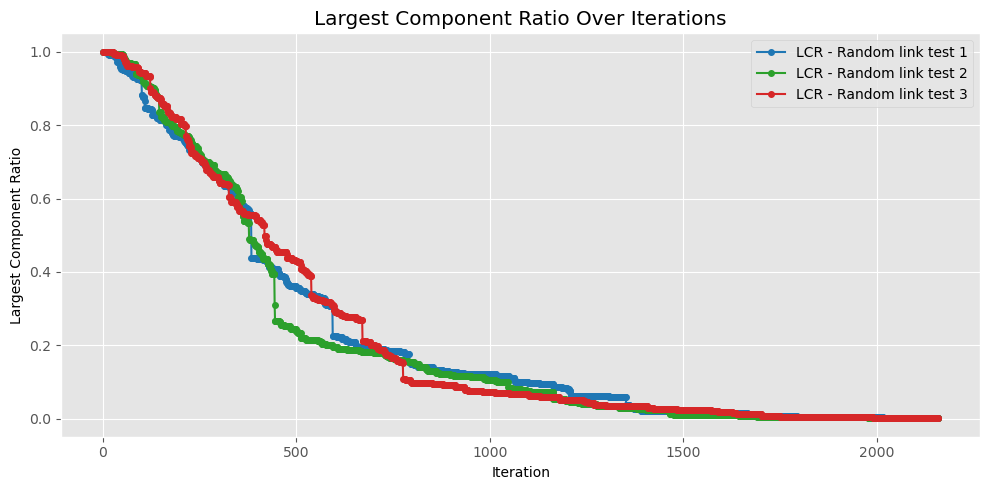

In [38]:
visualize_results_separate([remove_random_edge_multi_result,remove_random_edge_multi_result_2, remove_random_edge_multi_result_3],['Random link test 1', 'Random link test 2', 'Random link test 3'], percent_display=1)

In [32]:
def calculate_normalized_area(results_dict):
    # 计算全局效率的积分
    total_efficiency = sum(results_dict['global_efficiency'])
    # 计算最大连通分量比例的积分
    total_lcr = sum(results_dict['largest_component_ratio'])
    
    # 获取迭代次数
    num_iterations_efficiency = len(results_dict['global_efficiency'])
    num_iterations_lcr = len(results_dict['largest_component_ratio'])
    
    # 标准化积分结果
    normalized_efficiency_area = 100*total_efficiency / num_iterations_efficiency if num_iterations_efficiency > 0 else 0
    normalized_lcr_area = 100*total_lcr / num_iterations_lcr if num_iterations_lcr > 0 else 0
    
    print("Normalized Global Efficiency Area:", normalized_efficiency_area)
    print("Normalized Largest Component Ratio Area:", normalized_lcr_area)

    
    return normalized_efficiency_area, normalized_lcr_area






In [34]:
normalized_efficiency_area, normalized_lcr_area = calculate_normalized_area(remove_random_edge_multi_result)


Normalized Global Efficiency Area: 0.7978964594879455
Normalized Largest Component Ratio Area: 22.36942170767828


In [53]:
calculate_normalized_area(remove_random_node_result)
calculate_normalized_area(remove_highest_degree_node_simple_result)
calculate_normalized_area(remove_highest_degree_node_multi_result)
calculate_normalized_area(remove_highest_betweenness_node_simple_result)


Normalized Global Efficiency Area: 0.6632014038127848
Normalized Largest Component Ratio Area: 12.969179849901245
Normalized Global Efficiency Area: 0.2904204426579818
Normalized Largest Component Ratio Area: 5.254683268983341
Normalized Global Efficiency Area: 0.3430079656779825
Normalized Largest Component Ratio Area: 7.4354577796413714
Normalized Global Efficiency Area: 0.2974459532643927
Normalized Largest Component Ratio Area: 1.2617983266394373


(0.2974459532643927, 1.2617983266394373)

In [54]:
calculate_normalized_area(remove_random_edge_multi_result)
calculate_normalized_area(remove_edge_by_betweenness_simple_result)
calculate_normalized_area(remove_edge_by_betweenness_multi_result)

Normalized Global Efficiency Area: 0.7978964594879455
Normalized Largest Component Ratio Area: 22.36942170767828
Normalized Global Efficiency Area: 0.18801336293572002
Normalized Largest Component Ratio Area: 2.0395888652212872
Normalized Global Efficiency Area: 0.2633915906884109
Normalized Largest Component Ratio Area: 3.4453807896387803


(0.2633915906884109, 3.4453807896387803)